# Network of Subset of genes

03/22/2022

Clelia Corridori

Considering all data together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
import matplotlib
import numpy.linalg as la

import sys
sys.path.append('../')

import funcs as funcs
%load_ext autoreload
%autoreload 2

## DATA
We measure the gene expression for 24 genes.

Two different cell cultures are used for the measurements:
- 2i
- 2i+LIF

For each type of cell cultures we have 2 samples (cell cultures grown with identical conditions) and for each of them we have 8 different time step:
- 2i: [0, 12, 24, 36, 48, 60, 72, 84]
- 2i+LIF: [0, 24, 36, 48, 60, 72, 84, 96]

In [2]:
path = "C:/Users/cleli/OneDrive - Università degli Studi di Padova/LAVORO/GeneNetwork/"
file_name = "geni_IMP.xlsx"
df = pd.read_excel(path + file_name)
df

,EnsemblGeneID,Symbol,GM_2iL_2,GM_2iL_1,GM_24h_2iL_2,GM_24h_2iL_1,GM_36h_2iL_2,GM_36h_2iL_1,GM_48h_2iL_2,GM_48h_2iL_1,...,GM_36h_2i_1,GM_36h_2i_2,GM_48h_2i_1,GM_48h_2i_2,GM_60h_2i_1,GM_60h_2i_2,GM_72h_2i_1,GM_72h_2i_2,GM_84h_2i_1,GM_84h_2i_2
0,ENSMUSG00000003032,Klf4,721.246075,790.448527,362.034812,507.580169,338.426474,275.595044,109.118435,141.201368,...,15.825195,7.814844,19.079327,14.208553,38.803582,25.553683,17.314668,14.762640,31.121266,16.477378
1,ENSMUSG00000055148,Klf2,300.890974,288.413501,124.602767,102.125740,87.270395,86.229124,51.552016,27.900029,...,25.056559,32.040862,42.928486,27.909658,39.896640,34.467758,16.527638,14.762640,13.103691,5.703708
2,ENSMUSG00000021255,Esrrb,179.939742,201.400614,103.999160,83.834562,47.694286,52.413781,24.916808,11.228061,...,3.956299,3.125938,4.769832,1.522345,2.186117,4.159902,3.148121,1.845330,1.637961,3.168726
3,ENSMUSG00000026380,Tfcp2l1,797.584148,796.803401,135.395133,111.271328,69.511885,70.166836,22.339207,18.713434,...,7.912597,5.470391,6.359776,6.089380,7.104881,7.725532,4.722182,9.226650,12.284710,8.238689
4,ENSMUSG00000018604,Tbx3,212.656059,258.105641,129.508388,110.509196,19.788055,30.011117,6.873602,4.423175,...,0.659383,2.344453,2.384916,4.567035,10.384057,8.914075,8.657334,11.994645,12.284710,12.041160
5,ENSMUSG00000004040,Stat3,104.593073,110.477036,100.074664,74.688974,64.438024,70.589528,56.707218,26.879297,...,8.571981,8.596329,14.309495,9.641518,12.570174,10.696891,15.740607,16.607970,26.207382,15.209887
6,ENSMUSG00000055799,Tcf7l1,214.143165,222.420581,311.016356,241.595966,190.269757,213.882044,190.312861,154.130650,...,211.002599,154.733920,189.998299,163.905809,119.689921,153.322098,108.610191,119.946449,126.942008,114.074152
7,ENSMUSG00000012396,Nanog,172.999918,155.938825,66.716442,45.727943,31.965319,23.670740,10.740003,6.124397,...,5.934448,4.688907,10.334635,10.148967,34.977876,26.147955,22.823881,23.989290,11.465730,7.604943
8,ENSMUSG00000027547,Sall4,158.624566,155.449989,259.997900,187.484567,207.013495,222.758571,230.695273,224.561212,...,213.640131,202.404471,240.876504,231.396437,226.263139,209.183637,145.600618,144.858403,111.381375,116.609133
9,ENSMUSG00000024406,Pou5f1,72.372458,76.258485,62.791946,113.557725,111.117538,93.837576,76.039224,121.807446,...,60.663247,55.485396,54.058093,63.431041,43.175816,39.221932,18.101698,28.602615,16.379614,1.901236


In [3]:
col_names = np.array(df.columns)
# print(col_names)

col_names_2iL_1 = [col_names[3+2*i] for i in range(8)]
print(col_names_2iL_1)

col_names_2iL_2 = [col_names[2+2*i] for i in range(8)]
print(col_names_2iL_2)

col_names_2i_1 = [col_names[18+2*i] for i in range(8)]
print(col_names_2i_1)

col_names_2i_2 = [col_names[19+2*i] for i in range(8)]
print(col_names_2i_2)

['GM_2iL_1', 'GM_24h_2iL_1', 'GM_36h_2iL_1', 'GM_48h_2iL_1', 'GM_60h_2iL_1', 'GM_72h_2iL_1', 'GM_84h_2iL_1', 'GM_96h_2iL_1']
['GM_2iL_2', 'GM_24h_2iL_2', 'GM_36h_2iL_2', 'GM_48h_2iL_2', 'GM_60h_2iL_2', 'GM_72h_2iL_2', 'GM_84h_2iL_2', 'GM_96h_2iL_2']
['GM_2i_1', 'GM_12h_2i_1', 'GM_24h_2i_1', 'GM_36h_2i_1', 'GM_48h_2i_1', 'GM_60h_2i_1', 'GM_72h_2i_1', 'GM_84h_2i_1']
['GM_2i_2', 'GM_12h_2i_2', 'GM_24h_2i_2', 'GM_36h_2i_2', 'GM_48h_2i_2', 'GM_60h_2i_2', 'GM_72h_2i_2', 'GM_84h_2i_2']


In [4]:
df_2iL_1 = np.array(df.loc[:, col_names_2iL_1])
print("[# gene x # samples], set_1_2iL", df_2iL_1.shape)
df_2iL_2 = np.array(df.loc[:, col_names_2iL_2] )
print("[# gene x # samples], set_2_2iL", df_2iL_2.shape)

df_2i_1 = np.array(df.loc[:, col_names_2i_1])
print("[# gene x # samples], set_1_2i", df_2iL_1.shape)
df_2i_2 = np.array(df.loc[:, col_names_2i_2] )
print("[# gene x # samples], set_2_2i", df_2iL_2.shape)


# 1. concat all data of 2iL and of 2i, they are SEPARATED (then I average the C matrices)
print("\n 1st choice: concat all data of 2iL and of 2i SEPARATELY")
df_2iL = np.concatenate((df_2iL_1,df_2iL_2), 1)
print("[# gene x # samples], set_all_2iL", df_2iL.shape)
df_2i = np.concatenate((df_2i_1,df_2i_2), 1)
print("[# gene x # samples], set_all_2i", df_2i.shape)

# 2. concat all data of 2iL and of 2i, they are TOGETHER
print("\n 2nd choice: concat ALL DATA ")
df_all = np.concatenate((df_2i, df_2iL), 1)
print("[# gene x # samples], set_all_data", df_all.shape)

# 3. Initial Mean over different samples for 2iL and 2i
print("\n 3rd choice: Mean over different samples for 2iL and 2i ")
df_2iL_Mean = (df_2iL_1+df_2iL_2)/2 
print("[# gene x # samples], set_Mean_2iL", df_2iL_Mean.shape)
df_2i_Mean = (df_2i_1+df_2i_2)/2 
print("[# gene x # samples], set_Mean_2iL", df_2i_Mean.shape)

# 4. concat all AVERAGED data of 2iL and of 2i, they are TOGETHER
print(" \n 4th choice: concat all AVERAGED data of 2iL and of 2i ")
df_all_mean = np.concatenate((df_2i_Mean, df_2iL_Mean), 1)
print("[# gene x # samples], set_all_data", df_all.shape)

## PEARSON CORRELATION COEFFICIENTS

[# gene x # samples], set_1_2iL (24, 8)
[# gene x # samples], set_2_2iL (24, 8)
[# gene x # samples], set_1_2i (24, 8)
[# gene x # samples], set_2_2i (24, 8)

 1st choice: concat all data of 2iL and of 2i SEPARATELY
[# gene x # samples], set_all_2iL (24, 16)
[# gene x # samples], set_all_2i (24, 16)

 2nd choice: concat ALL DATA 
[# gene x # samples], set_all_data (24, 32)

 3rd choice: Mean over different samples for 2iL and 2i 
[# gene x # samples], set_Mean_2iL (24, 8)
[# gene x # samples], set_Mean_2iL (24, 8)
 
 4th choice: concat all AVERAGED data of 2iL and of 2i 
[# gene x # samples], set_all_data (24, 32)


1st
determinant 1.9039905220951217e-27

2nd
determinant:  3.184201427569914e-27

3rd
determinant 2.239802252936892e-166

4th
determinant:  2.591718749982647e-151


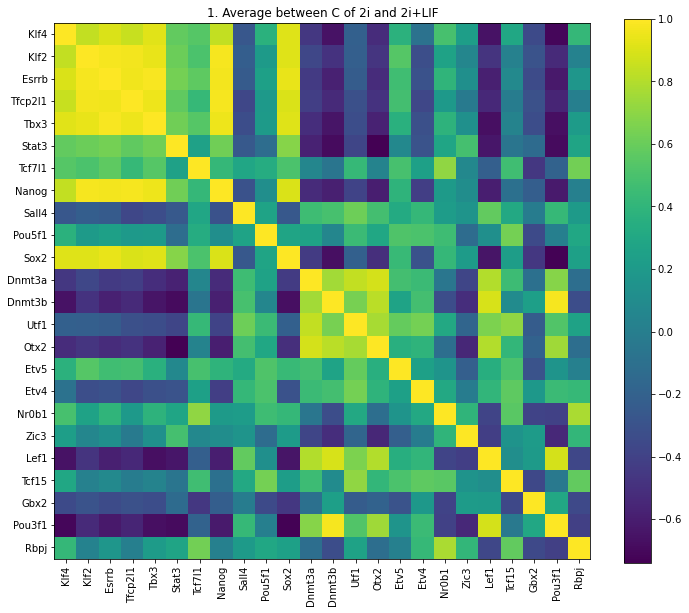

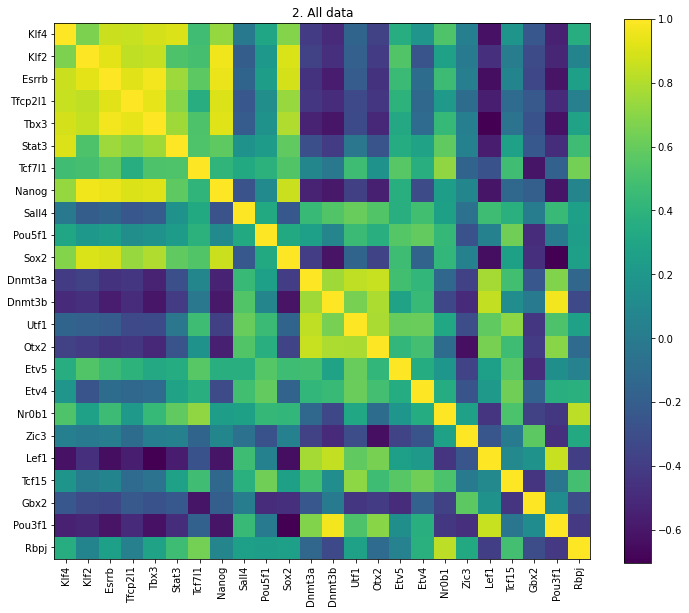

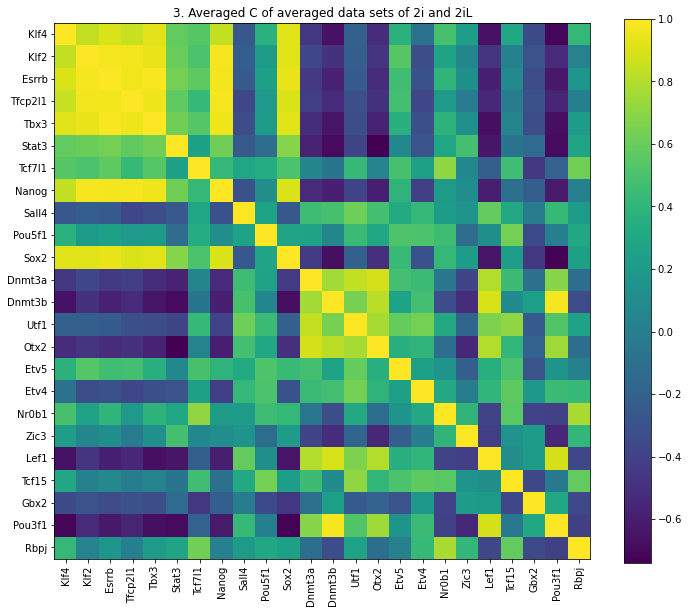

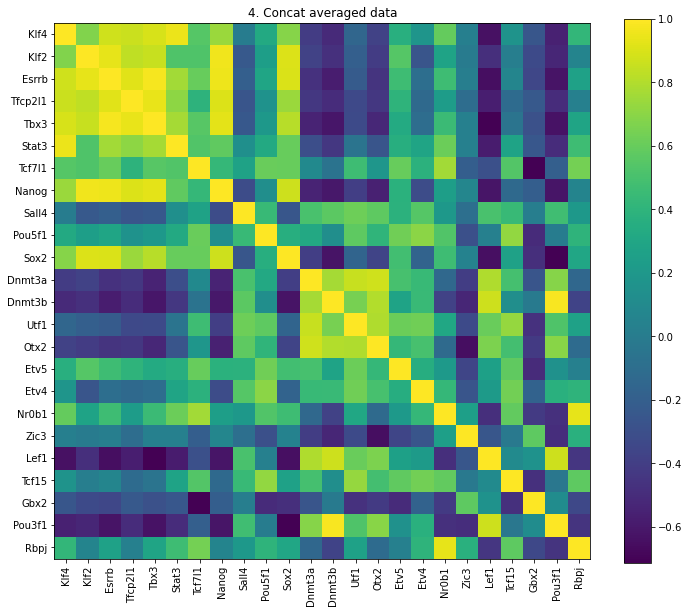

In [5]:
genes = np.array(df["Symbol"])

# 1.
print("1st")
C_2i = funcs.Pearson_info(df_2i, det=False)
C_2iL = funcs.Pearson_info(df_2iL, det=False)
C_all_1 = (C_2i+C_2iL)/2
print("determinant", la.det(C_all_1))
funcs.fig_matx(C_all_1, genes, "1. Average between C of 2i and 2i+LIF")

# 2. 
print("\n2nd")
C_all_2 = funcs.Pearson_info(df_all, det=True)
funcs.fig_matx(C_all_2, genes, "2. All data")

# 3.
print("\n3rd")
C_2i_mean = funcs.Pearson_info(df_2i_Mean, det=False)
C_2iL_mean = funcs.Pearson_info(df_2iL_Mean, det=False)
C_all_3 = (C_2i_mean+C_2iL_mean)/2
print("determinant", la.det(C_all_3))
funcs.fig_matx(C_all_1, genes, "3. Averaged C of averaged data sets of 2i and 2iL")

# 4. 
print("\n4th")
C_all_4 = funcs.Pearson_info(df_all_mean, det=True)
funcs.fig_matx(C_all_4, genes, "4. Concat averaged data")

1st


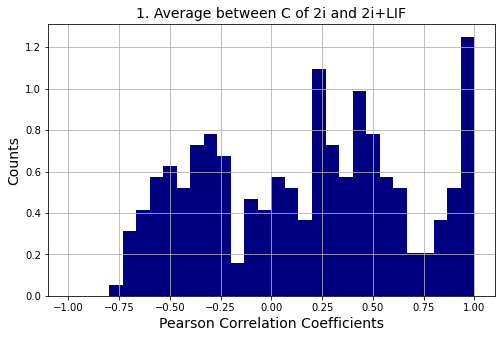


2nd


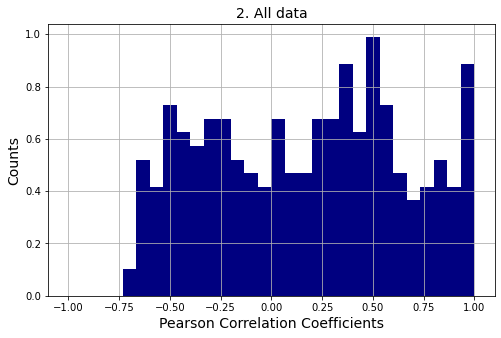


3rd


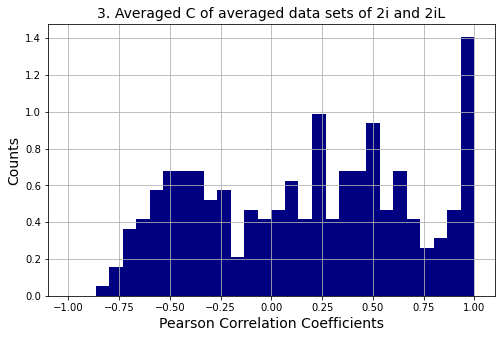


4th


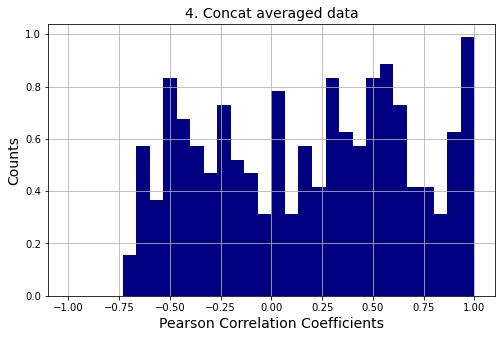

<ipython-input-6-9b19d76b044c>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(centroids, np.abs(counts1-counts2)/(counts1), label="Diff 1-2")
<ipython-input-6-9b19d76b044c>:27: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(centroids, np.abs(counts1-counts3)/(counts1), label="Diff 1-3")
<ipython-input-6-9b19d76b044c>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(centroids, np.abs(counts1-counts3)/(counts1), label="Diff 1-3")
<ipython-input-6-9b19d76b044c>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(centroids, np.abs(counts1-counts4)/(counts1), label="Diff 1-4")
<ipython-input-6-9b19d76b044c>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(centroids, np.abs(counts2-counts4)/(counts2), label="Diff 2-4")


Text(0.5, 1.0, 'Differences')

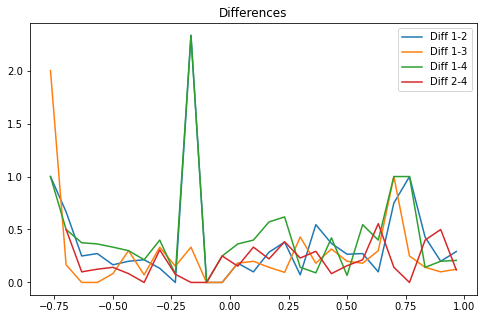

In [6]:
# distribution of correlation coefficient
# counts_2i, bins_2i, patches_2i, __ = funcs.fig_distribution(C_2i, "2i")
# counts_2iL,  bins_2iL, patches_2iL, __ = funcs.fig_distribution(C_2iL, "2i+LIF")


# 1.
print("1st")
counts1, bins1, patches1, _ = funcs.fig_distribution(C_all_1, "1. Average between C of 2i and 2i+LIF")

# 2. 
print("\n2nd")
counts2, bins2, patches2, _ = funcs.fig_distribution(C_all_2, "2. All data")

# 3.
print("\n3rd")
counts3, bins3, patches3, _ = funcs.fig_distribution(C_all_3, "3. Averaged C of averaged data sets of 2i and 2iL")

# 4. 
print("\n4th")
counts4, bins4, patches4, _ = funcs.fig_distribution(C_all_4, "4. Concat averaged data")


# differences
plt.figure(figsize=(8,5))
centroids = (bins1[1:] + bins1[:-1]) / 2
plt.plot(centroids, np.abs(counts1-counts2)/(counts1), label="Diff 1-2")
plt.plot(centroids, np.abs(counts1-counts3)/(counts1), label="Diff 1-3")
plt.plot(centroids, np.abs(counts1-counts4)/(counts1), label="Diff 1-4")
plt.plot(centroids, np.abs(counts2-counts4)/(counts2), label="Diff 2-4")
plt.legend()
plt.title("Differences")

## MATRICES OF THE INTERACTIONS 

### With Spectral Decomposition

In [7]:
# np.fill_diagonal(C_Mean, 0)

THR = 0.001

eigval, eigvect = funcs.eigval_analysis(C_all_3, thr = THR, info=False, fig=False)
# print(eigval[-2:])


# check
print("original determinant", la.det(np.diag(eigval)))
print("determinant with cut eigenvalues", la.det(np.diag(eigval[:9])))
print(eigval[9])

original determinant -3.365322218698146e-168
determinant with cut eigenvalues 2.333577345582414
0.09551271735044747


1st
level of the cut-off 0.0 , 0.0% of 6.650270417642852
('min', -9.573046636734867, 'max', 6.650270417642852)


C:\Users\cleli\Biology_genes\funcs.py:124: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
  cmap.set_bad(color='white')
C:\Users\cleli\Biology_genes\funcs.py:128: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(masked_array, norm=colors.SymLogNorm(lintsh), cmap=cmap)


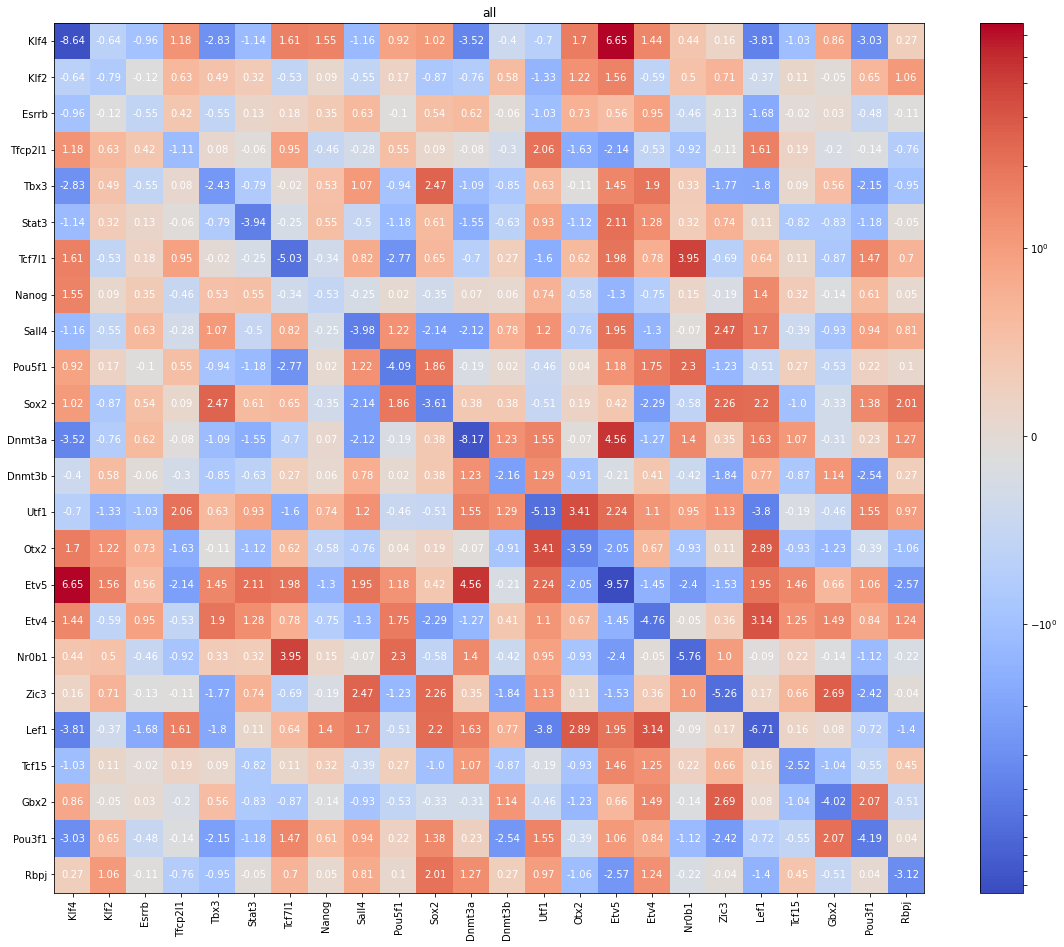

The ten strongest interactions: 
 [['Tcf7l1', 'Tbx3'], ['Tbx3', 'Tcf7l1'], ['Nanog', 'Pou5f1'], ['Pou5f1', 'Nanog'], ['Dnmt3b', 'Pou5f1'], ['Pou5f1', 'Dnmt3b'], ['Esrrb', 'Tcf15'], ['Tcf15', 'Esrrb'], ['Gbx2', 'Esrrb'], ['Esrrb', 'Gbx2']]


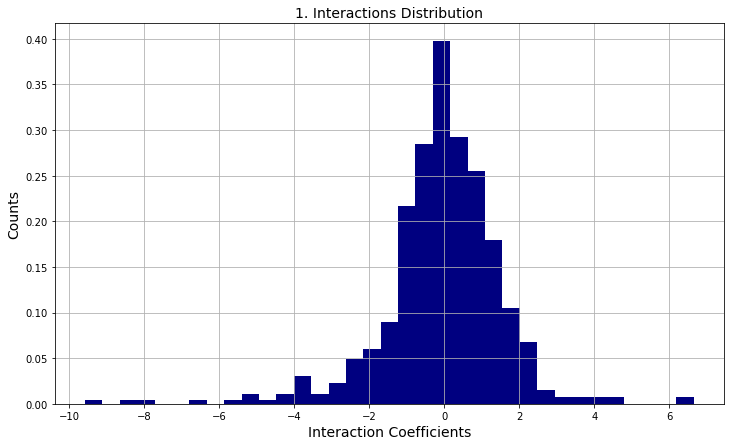

In [8]:
#pseudo inverse

# 1.
print("1st")
thr1 = 0.03
eigval1, eigvect1 = funcs.eigval_analysis(C_all_1, thr = thr1, info=False, fig=False)
Mint1 = -np.linalg.pinv(C_all_1, rcond=thr1/np.max(eigval1))

# figures 
perc = 0.0       ############################## threshold
level1 = np.max(Mint1)*perc 
print("level of the cut-off", level1, ", "+str(perc*100)+"% of", np.max(Mint1))
funcs.fig_matx_int_text(Mint1, genes, "all", thr=level1, lintsh=1, log=True)

# Info
rows1, cols1 = funcs.ind_val_abs(Mint1, 10, False)
gene_names1 = funcs.gene_list(rows1, cols1, genes)
print("The ten strongest interactions: \n", gene_names1)
# distribution of interaction coefficients
funcs.fig_distr_int(Mint1, level1, "1. Interactions Distribution")



2nd
level of the cut-off 0.0 0.0% of  571.9657739561773
('min', -1202.6227448290963, 'max', 571.9657739561773)

C:\Users\cleli\Biology_genes\funcs.py:124: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
  cmap.set_bad(color='white')
C:\Users\cleli\Biology_genes\funcs.py:128: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(masked_array, norm=colors.SymLogNorm(lintsh), cmap=cmap)


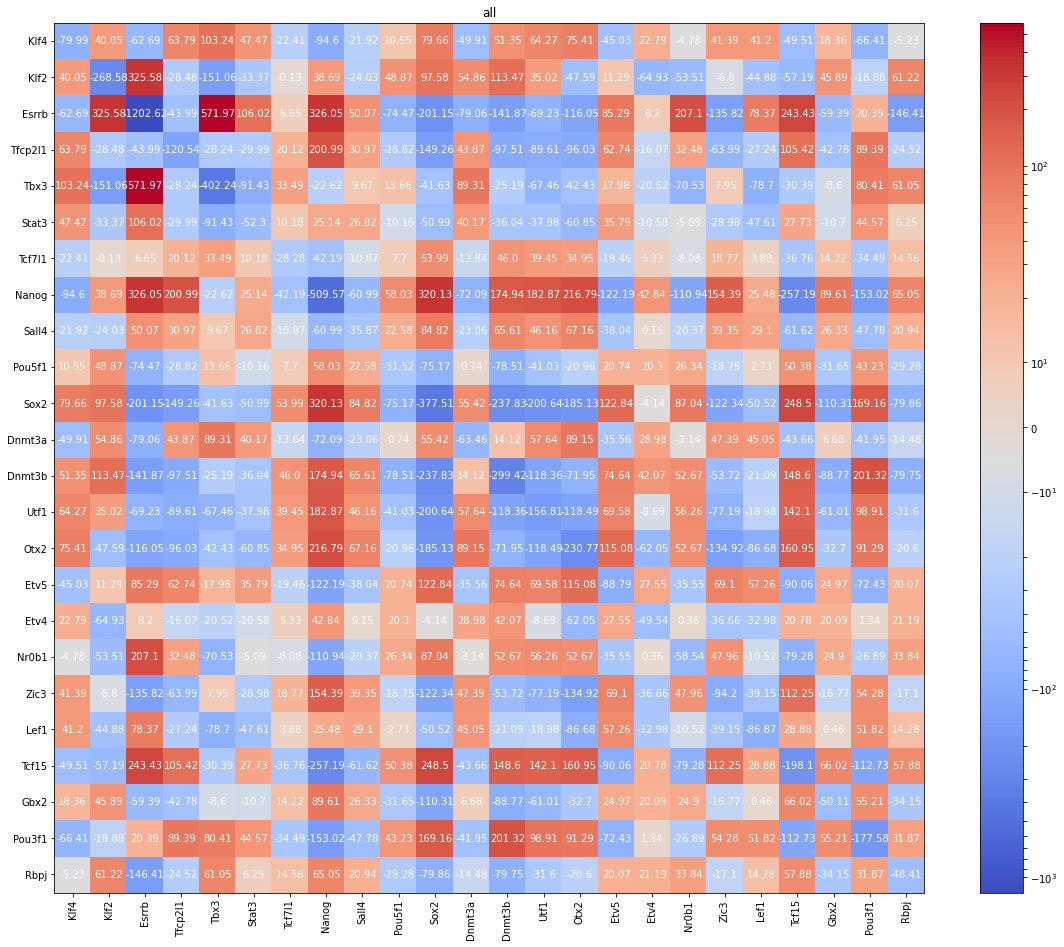

The ten strongest interactions: 
 [['Tcf7l1', 'Klf2'], ['Klf2', 'Tcf7l1'], ['Etv4', 'Sall4'], ['Sall4', 'Etv4'], ['Etv4', 'Nr0b1'], ['Nr0b1', 'Etv4'], ['Gbx2', 'Lef1'], ['Lef1', 'Gbx2'], ['Dnmt3a', 'Pou5f1'], ['Pou5f1', 'Dnmt3a']]


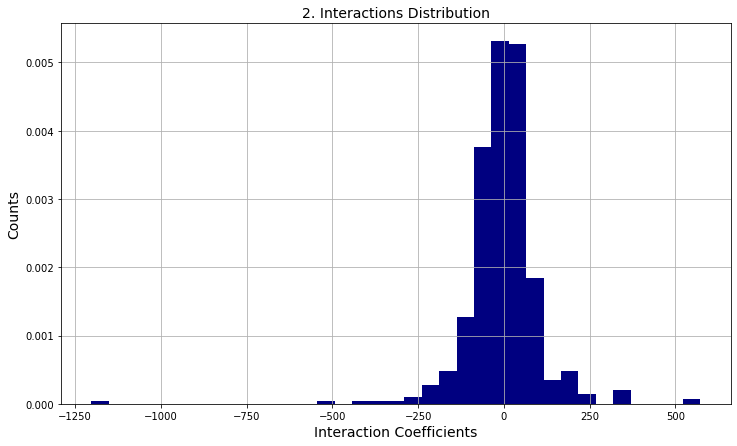

In [9]:
# 2. 
print("\n2nd")
thr2 = 0.00001
eigval2, eigvect2 = funcs.eigval_analysis(C_all_2, thr = thr2, info=False, fig=False)
Mint2 = -np.linalg.pinv(C_all_2, rcond=thr2/np.max(eigval2))
# Mint2[Mint2<-1200]=-600

# figures 
perc = 0.0
level2 = np.max(Mint2)*perc
print("level of the cut-off", level2, str(perc*100)+"% of ", np.max(Mint2))
# funcs.fig_matx_int(Mint2, genes, "all", thr = level2, lintsh = 10)
funcs.fig_matx_int_text(Mint2, genes, "all", thr=level2, lintsh=20, log=True)

# Info
rows2, cols2 = funcs.ind_val_abs(Mint2, 10, False)
gene_names2 = funcs.gene_list(rows2, cols2, genes)
print("The ten strongest interactions: \n", gene_names2)
# distribution of interaction coefficients
funcs.fig_distr_int(Mint2, level2, "2. Interactions Distribution", Print=True)



3rd
# eigvals below thr = 0.1 :  (15,)
level of the cut-off 0.0 0.0% of  1.0482421242320525


C:\Users\cleli\Biology_genes\funcs.py:124: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
  cmap.set_bad(color='white')
C:\Users\cleli\Biology_genes\funcs.py:128: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(masked_array, norm=colors.SymLogNorm(lintsh), cmap=cmap)


('min', -2.413402281357317, 'max', 1.0482421242320525)


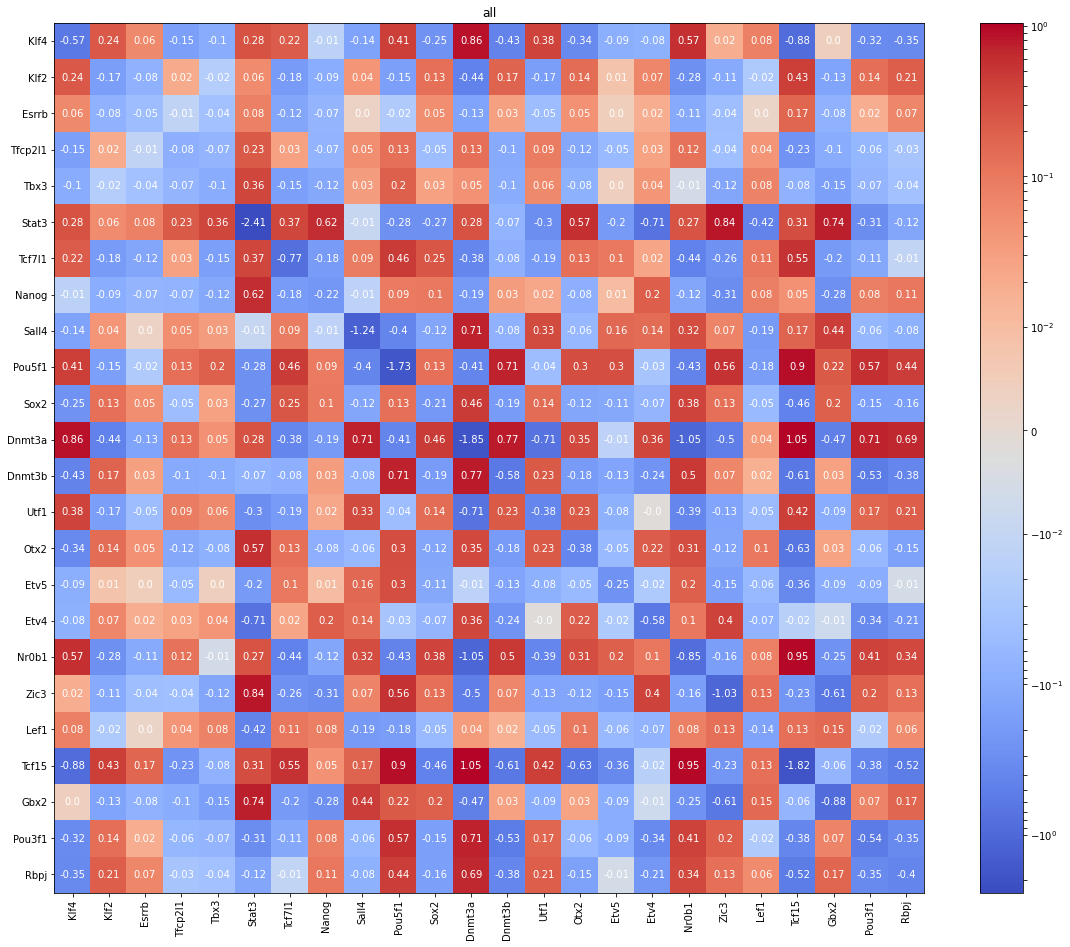

The ten strongest interactions: 
 [['Etv4', 'Utf1'], ['Utf1', 'Etv4'], ['Esrrb', 'Lef1'], ['Lef1', 'Esrrb'], ['Esrrb', 'Sall4'], ['Sall4', 'Esrrb'], ['Etv5', 'Tbx3'], ['Tbx3', 'Etv5'], ['Gbx2', 'Klf4'], ['Klf4', 'Gbx2']]


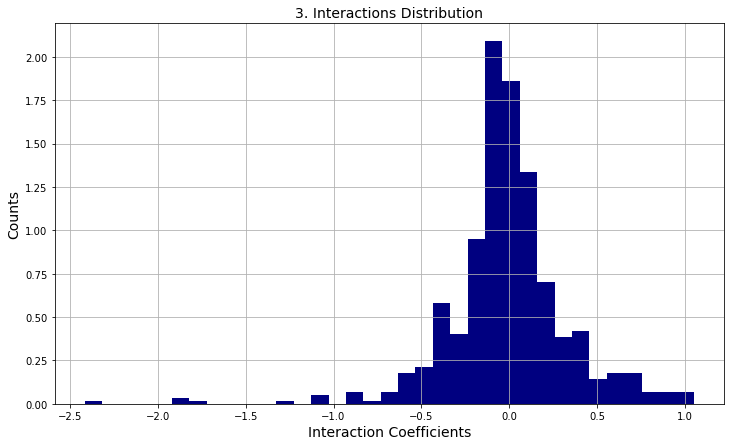

In [10]:
# 3.
print("\n3rd")
thr3 = 0.1
eigval3, eigvect3 = funcs.eigval_analysis(C_all_3, thr = thr3, info=True, fig=False)
Mint3 = -np.linalg.pinv(C_all_3, rcond=thr3/np.max(eigval3))
# figures 
level3 = np.max(Mint3)*perc 
print("level of the cut-off", level3, str(perc*100)+"% of ", np.max(Mint3))
# funcs.fig_matx_int(Mint3, genes, "all", thr = level3, lintsh = 0.1)
funcs.fig_matx_int_text(Mint3, genes, "all", thr=level3, lintsh=0.01, log=True)
# Info
rows3, cols3 = funcs.ind_val_abs(Mint3, 10, False)
gene_names3 = funcs.gene_list(rows3, cols3, genes)
print("The ten strongest interactions: \n", gene_names3)
# distribution of interaction coefficients
funcs.fig_distr_int(Mint3, level3, "3. Interactions Distribution")




4th
# eigvals below thr = 0.1 :  (14,)
level of the cut-off 0.0 0.0% of  1.4976031896702162


C:\Users\cleli\Biology_genes\funcs.py:124: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
  cmap.set_bad(color='white')
C:\Users\cleli\Biology_genes\funcs.py:128: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.imshow(masked_array, norm=colors.SymLogNorm(lintsh), cmap=cmap)


('min', -2.6163365221349935, 'max', 1.4976031896702162)


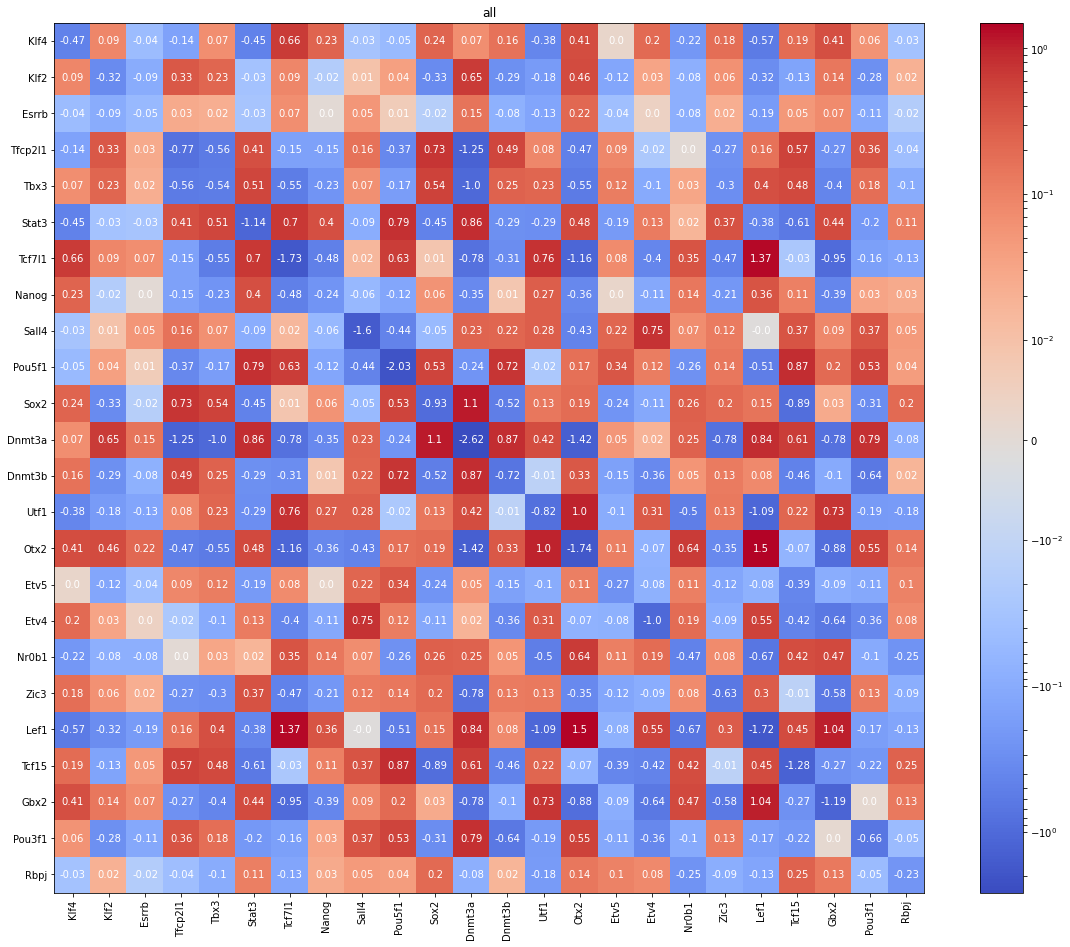

The ten strongest interactions: 
 [['Esrrb', 'Nanog'], ['Nanog', 'Esrrb'], ['Nr0b1', 'Tfcp2l1'], ['Tfcp2l1', 'Nr0b1'], ['Pou3f1', 'Gbx2'], ['Gbx2', 'Pou3f1'], ['Lef1', 'Sall4'], ['Sall4', 'Lef1'], ['Etv5', 'Klf4'], ['Klf4', 'Etv5']]


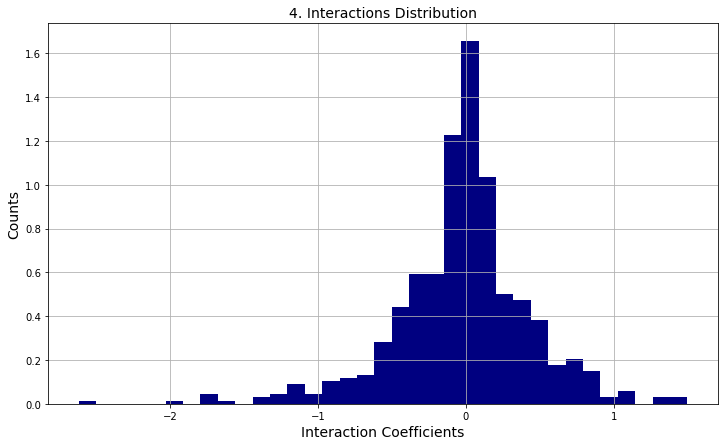

In [11]:
# 4. 
print("\n4th")
thr4 = 0.1
eigval4, eigvect4 = funcs.eigval_analysis(C_all_4, thr = thr4, info=True, fig=False)
Mint4 = -np.linalg.pinv(C_all_4, rcond=thr4/np.max(eigval4))
# figures 
level4 = np.max(Mint4)*perc 
print("level of the cut-off", level4, str(perc*100)+"% of ", np.max(Mint4))
# funcs.fig_matx_int(Mint4, genes, "all", thr = level4, lintsh = 0.1)
funcs.fig_matx_int_text(Mint4,genes, "all", thr=level4,lintsh=0.01, log=True)
# Info
rows4, cols4 = funcs.ind_val_abs(Mint4, 10, False)
gene_names4 = funcs.gene_list(rows4, cols4, genes)
print("The ten strongest interactions: \n", gene_names4)
# distribution of interaction coefficients
funcs.fig_distr_int(Mint4, level4, "4. Interactions Distribution")